# Custom Google Trends Reports with Pandas

## Imports

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import pytrends
from pytrends.request import TrendReq

In [72]:
pytrends = TrendReq(hl='en-US')

# 

### Interest over Time - Bar chart

In [73]:
kw_list = ["Java", "Python", "Javascript"]
pytrends.build_payload(kw_list, geo='', timeframe='2016-01-01 2020-12-31')

<AxesSubplot:xlabel='date'>

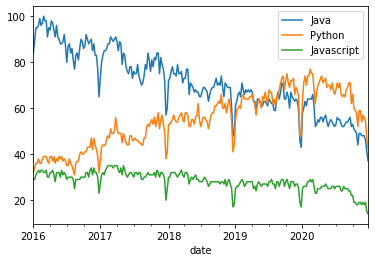

In [75]:
time_interest = pytrends.interest_over_time()
del time_interest['isPartial']
time_interest.plot()

AttributeError: 'AxesSubplot' object has no attribute 'fig'

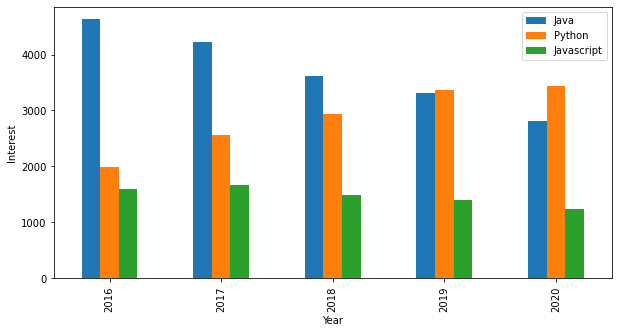

In [85]:
time_interest = time_interest.groupby(pd.Grouper(freq='Y')).sum()

ax = time_interest.plot(kind='bar', xlabel='Year', ylabel="Interest", figsize=(10, 5))
ax.set_xticklabels([pandas_datetime.strftime("%Y") for pandas_datetime in time_interest.index])
ax.set_title('Interest Over Time', fontsize=20)
ax.xaxis.set_ticks_position('none')

# 

### Interest by Region - Pie chart

In [77]:
kw_list = ["stack overflow"]
pytrends.build_payload(kw_list)

regions = pytrends.interest_by_region()
regions = regions.sort_values(kw_list[0], ascending=False)[:15]
regions.head()

,stack overflow
geoName,
China,100
Israel,43
St. Helena,41
Nepal,38
Sri Lanka,36


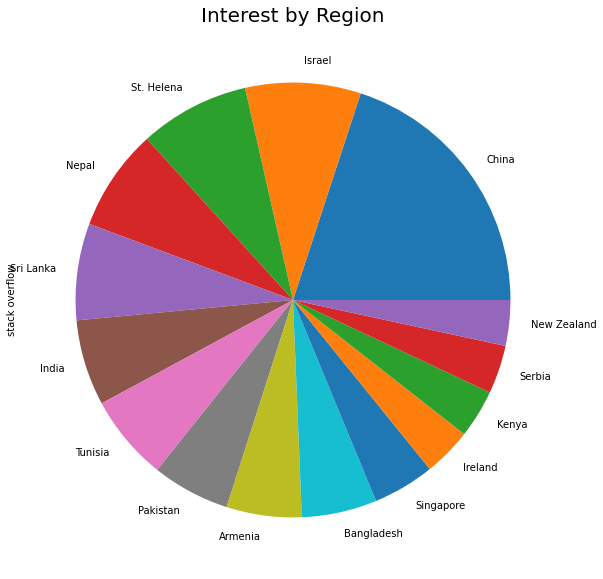

In [78]:
ax = regions.plot(kind = 'pie', figsize=(10, 10), subplots=True, legend=False)
ax = ax.flatten()[0]
ax.set_title('Interest by Region', fontsize=20)
ax.xaxis.set_ticks_position('none')

# 

### Interest over Time - KDE plot

In [79]:
kw_list = ["Java", "Python", "Javascript"]
pytrends.build_payload(kw_list, timeframe='2016-01-01 2020-12-31', cat=0, gprop='')
interest = pytrends.interest_over_time()
interest.head()

,Java,Python,Javascript,isPartial
date,,,,
2016-01-03,84,32,29,False
2016-01-10,89,34,29,False
2016-01-17,95,36,31,False
2016-01-24,95,36,32,False
2016-01-31,96,38,33,False


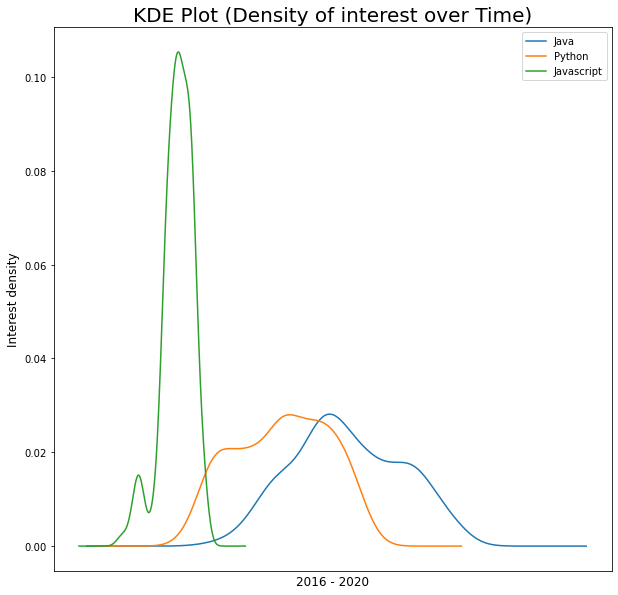

In [81]:
ax = interest.plot(kind='density', figsize=(10, 10))
ax.set_xticks([])

ax.set_title('KDE Plot (Density of interest over Time)', fontsize=20)
ax.set_xlabel('2016 - 2020', fontsize=12)
ax.set_ylabel('Interest density', fontsize=12)
ax.xaxis.set_ticks_position('none')